# Q1) Find the descriptive statistics for temperature of each day of a given month for the year 2007.
We will use weather data from NCDC. You can access the hourly weather data from ‘Data Sets’ folder under the “Coursework submission” (The Data Set zipped folder). We have chosen the hourly records for April, May, June and July from year 2007. A month is represented per file. You may select any one of the four months (files) for analysis. 

You will find the weather data from different weather stations (wban - first column). Using the hourly data across all weather stations, find 
•the daily maximum and minimum “Dry Bulb Temp” across all the weather stations 
•the daily mean and median of “Dry Bulb Temp” over all the weather stations 
•the daily variance of “Dry Bulb Temp” over all the weather stations 

Step 1: Importing libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


Step 2: Merge all txt files to one txt file. Better working with one file

In [3]:
import shutil;
print("Enter 'x' to exit");
filename1 = input("Enter first file name");

if filename1 == 'x':
    exit();

else:
    filename2 = input("Enter second file name");
    filename3 = input("Enter third file name");
    filename4 = input("Enter forth file name");
    filename5 = input("Create newfile to merge content");
    print();
    print("Merging the content of the files in",filename5);
    with open(filename5,"wb") as wfd:
        for f in[filename1,filename2,filename3,filename4]:
            with open(f,"rb") as fd:
                shutil.copyfileobj(fd,wfd,1024*1024*10);
    print("Content merged successfully");
    print("want to see?(y/n):");
    check = input();
    if check == input():
        exit();
    else:
        print();
        c=open(filename5,"r");
        rint(c.read());
        c.close();

Enter 'x' to exit
Enter first file name200704hourly.txt
Enter second file name200705hourly.txt
Enter third file name200706hourly.txt
Enter forth file name200707hourly.txt
Create newfile to merge contentbigdatafile.txt

Merging the content of the files in bigdatafile.txt
Content merged successfully
want to see?(y/n):
n
n


Step 3: Convert merged txt files to a csv file

In [3]:
#Convert merged txt files to a csv file
import csv

with open('bigdatafile.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",") for line in stripped if line)
    with open('bigdatafileall.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerows(lines)

Step 4: a) Map Reduce

In [17]:
import sys

(last_key,max_val)=(None,0)

for line in sys.stdin:
    (key,val)=Wban_Number.Dry_Bulb_Temp

    if last_key and last_key !=key:
        print((last_key,max_val))
        (last_key,max_val)=(key,float(val))
    else:
        (last_key,max_val)=(key,max(max_val,float(val)))

if last_key:
    print((last_key,max_val))

b) Max Mapper

In [19]:
#! /usr/bin/env python3
import sys

Station_Type = None
Year_Month_Day = None
current_max_temp = 0

for line in sys.stdin:
    # split the line by comma and obtain the date and hourly dry bulb temperature   
    try:
        Time = line.split(",")
        Station_Type = hourly_weather[0]
        Year_Month_Day = hourly_weather[1]
        Dry_Bulb_Temp = float(hourly_weather[8])
    except (ValueError, IndexError):
        continue

    # given that the data is already sorted by date and station
    if Station_Type == current_station and Year_Month_Day == current_date:
        if Dry_Bulb_Temp > current_max_temp:
            current_max_temp = Dry_Bulb_Temp
    else:
        if current_date:
            print ("%s\t%s" % (Year_Month_Day, Dry_Bulb_Temp))
        current_date = date
        current_station = station
        current_max_temp = dry_bulb_temp

c) Max Reducer

In [20]:
#! /usr/bin/env python3
import sys

current_date = None
current_max_temp = 0

for line in sys.stdin:
    date, temp = line.split('\t', 1)

    temp = float(temp)

    if date == current_date:
        if temp > current_max_temp:
            current_max_temp = temp

    else:
        if current_date:
            print ("%s\t%s" % (current_date, current_max_temp))
        current_date = date
        current_max_temp = temp

# print the last row
if current_date:
    print ("%s\t%s" % (current_date, current_max_temp))

d) Min Mapper

In [21]:
#! /usr/bin/env python3
import sys

current_station = None
current_date = None
current_min_temp = 0

for line in sys.stdin:
    # split the line by comma and obtain the date and hourly dry bulb temperature
    try:
        hourly_weather = line.split(",")
        station = hourly_weather[0]
        date = hourly_weather[1]
        dry_bulb_temp = float(hourly_weather[8])
    except (ValueError, IndexError):
        continue

    # given that the data is already sorted by date and station
    if station == current_station and date == current_date:
        if dry_bulb_temp < current_min_temp:
            current_min_temp = dry_bulb_temp
    else:
        if current_date:
            print ("%s\t%s" % (current_date, current_min_temp))
        current_date = date
        current_station = station
        current_min_temp = dry_bulb_temp

e) Min Reducer

In [22]:
#! /usr/bin/env python3
import sys

current_date = None
current_min_date = 0

for line in sys.stdin:
    date, temp = line.split('\t', 1)

    temp = float(temp)

    if date == current_date:
        if temp < current_min_date:
            current_min_date = temp

    else:
        if current_date:
            print ("%s\t%s" % (current_date, current_min_date))
        current_date = date
        current_min_date = temp

# print the last row
if current_date:
    print ("%s\t%s" % (current_date, current_min_date))

f) Daily Variance

# Q2) Cluster Analysis using Apache Mahout. 
For this question, you can use the data (The Data Set zipped folder) provided in Topic 4 for the k-means algorithm. You are welcome to use your own dataset for this question. If you choose to do so, please provide a link to the data in your report. 

As we discussed in the text clustering topic (Topic 4), the terms of the documents are considered as features in text clustering. The vector space model is an algebraic model that maps the terms in a document into n-dimensional linear space. However, we need to represent the textual information (terms) as a numerical representation and create feature vectors using the numerical values to evaluate the similarity between data points. 

Use Apache Mahout and perform the standard steps for the cluster analysis, 1) create sequence files from the raw text, 2) create a sparse (efficient) representation of the vectors, initializing approximate centroids for K-Means, 3) run the K-Means algorithm, 4) get the final iteration’s clustering solution, and 5) evaluate the final solution.

•	Implement the K-Means clustering algorithm with cosine distance to cluster the instances into K clusters.

•	Vary the value of K and comment on the precision.

•	Plot a graph that shows the relation between the average distance to the cluster centroid (or efficiency metric) and the K-value.

•	Try to smooth the graph so that you can explain the value of K as the best value such that beyond this value there wouldn’t be a significant reduction in the average distance to the cluster centroids.

•	Consider other distance measure of your choice and compare the different clusters you obtained in both the cases. Discuss which is the best setting for K-means clustering for this dataset.

k-Nearest Neighbor(k-NN) is an instance-based supervised learning algorithm which classifies a new instance by comparing it with already stored instances in the memory that have already been seen in training. This will be implemented using the iris dataset found on the link below.

link to the dataset: https://www.kaggle.com/uciml/iris/download

The Cosine distance will be compared to other distastace metric measures.(Euclidean Distance and the Normalized Euclidean)
k-Nearest Neighbor(k-NN) is an instance-based supervised learning algorithm which classifies a new instance by comparing it with already stored instances in the memory that have already been seen in training. This will be implemented using the iris dataset found on the link below.

link to the dataset: https://www.kaggle.com/uciml/iris/download

The Cosine distance will be compared to other distastace metric measures.(Euclidean Distance and the Normalized Euclidean)

> Step 1 : Loading the libraries which are required

In [ ]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt

> Step 2 : Load the dataset

In [ ]:
# loading the dataset
data = pd.read_csv('bigdatafileall.csv')
data.head()

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,

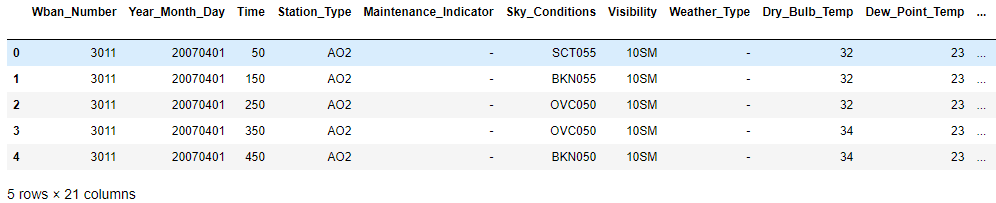

In [42]:
from IPython.display import Image
Image(filename='header.PNG')

Step 3 : Divide the dataset into development set and test set.

In [ ]:
indices = np.random.permutation(data.shape[0])
div = int(0.75 * len(indices))
development_id, test_id = indices[:div], indices[div:]

development_set, test_set = data.loc[development_id,:], data.loc[test_id,:]
print("Development Set:\n", development_set, "\n\nTest Set:\n", test_set)

Development Set:
          Wban_Number  Year_Month_Day  Time Station_Type Maintenance_Indicator  \
90593           3872        20070419  1415         AO2                      -   
14321           3040        20070422  2352         AO2                      -   
790272         25617        20070426  1956         AO1                      -   
265648          4969        20070430   255         AO2                      -   
1041255        63822        20070424  1640         AO1                      -   
...              ...             ...   ...          ...                   ...   
896664         53872        20070419  2153         AO2                      -   
706061         24091        20070425   753         AO2                      -   
191142          4857        20070427  1727         AO2                      -   
133504          3974        20070412  1054         AO2                      -   
615806         23048        20070425  1053         AO2                      -   

                                        Sky_Conditions Visibility  \
90593    FEW001 BKN034 OVC040                             3SM       
14321    OVC012                                           10SM      
790272   CLR                                              10SM      
265648   CLR                                              10SM      
1041255  CLR                                              10SM      
...                                                ...        ...   
896664   BKN060 OVC090                                    5SM       
706061   OVC011                                           6SM       
191142   BKN025 OVC033                                    10SM      
133504   FEW031                                           10SM      
615806   CLR                                              10SM      

        Weather_Type Dry_Bulb_Temp Dew_Point_Temp  ... %_Relative_Humidity  \
90593         #NAME?             -              -  ...                   -   
14321              -            43             37  ...                  79   
790272             -             -              -  ...                   -   
265648             -            50             32  ...                  50   
1041255            -            84             50  ...                  31   
...              ...           ...            ...  ...                 ...   
896664        #NAME?            50             47  ...                  89   
706061        #NAME?            37             34  ...                  89   
191142             -             -              -  ...                   -   
133504             -            45             30  ...                  56   
615806             -            63             28  ...                  27   

        Wind_Speed (kt) Wind_Direction Wind _Char_Gusts Val_for Wind Char.  \
90593                 0              0                -                  0   
14321                17            170                -                  0   
790272               10             20                G                 15   
265648                4             60                -                  0   
1041255               6            200                -                  0   
...                 ...            ...              ...                ...   
896664                5             70                -                  0   
706061               22            350                G                 30   
191142               11            290                -                  0   
133504                9             30                G                 14   
615806               24            360                G                 33   

        Station_Pressure Pressure_Tendency Sea_Level_Pressure Record_Type  \
90593                  -                 -                  -          SP   
14321              29.96                 -                  -          AA   
790272              29.5                 -                  -          AA   
265648             29.96                 -                  -          AA   
1041255            30.09                 -                  -          AA   
...                  ...               ...                ...         ...   
896664             29.24                 1                165          AA   
706061             26.68                 1                194          AA   
191142                 -                 -                  -          SP   
133504             28.59                 -                204          AA   
615806             25.89                 8                142          AA   

        Precip_Total  
90593              -  
14321              -  
790272             -  
265648             -  
1041255            -  
...              ...  
896664          0.04  
706061          0.04  
191142             -  
133504             -  
615806             -  

[786431 rows x 21 columns] 

Test Set:
          Wban_Number  Year_Month_Day  Time Station_Type Maintenance_Indicator  \
993128         54782        20070401   454         AO2                      -   
300425         12849        20070404   153         AO2                      -   
860266         46406        20070414  1856            -                     -   
598676         22516        20070423   754         AO2                      -   
639415         23130        20070425  1351         AO2                      -   
...              ...             ...   ...          ...                   ...   
1041395        63822        20070430  1240         AO1                      -   
959306         53971        20070407   845         AO2                      -   
256326          4956        20070416  1142         AO2                      -   
407894         13869        20070412   753         AO2                      -   
956877         53966        20070424  1745         AO2                      -   

                                        Sky_Conditions Visibility  \
993128   BKN070 OVC090                                    10SM      
300425   FEW022                                           10SM      
860266   SCT060 BKN090 OVC250                             20SM      
598676   FEW041 BKN065 OVC080                             10SM      
639415   FEW300                                           10SM      
...                                                ...        ...   
1041395  CLR                                              10SM      
959306   OVC080                                           10SM      
256326   CLR                                              10SM      
407894   CLR                                              10SM      
956877   CLR                                              7SM       

        Weather_Type Dry_Bulb_Temp Dew_Point_Temp  ... %_Relative_Humidity  \
993128             -            42             32  ...                  68   
300425             -            74             64  ...                  71   
860266             -             -              -  ...                   -   
598676             -            70             61  ...                  73   
639415             -            82             42  ...                  24   
...              ...           ...            ...  ...                 ...   
1041395            -            88             34  ...                  15   
959306             -             -              -  ...                   -   
256326             -            63             30  ...                  29   
407894             -            65             50  ...                  59   
956877             -             -              -  ...                   -   

        Wind_Speed (kt) Wind_Direction Wind _Char_Gusts Val_for Wind Char.  \
993128                5             70                -                  0   
300425                7            130                -                  0   
860266                8            240                -                  0   
598676               11             50                -                  0   
639415               10            140                -                  0   
...                 ...            ...              ...                ...   
1041395               4            190                -                  0   
959306               10             40                -                  0   
256326                5            110                -                  0   
407894                5            290                -                  0   
956877               22            170                G                 30   

        Station_Pressure Pressure_Tendency Sea_Level_Pressure Record_Type  \
993128              29.9                 -                236          AA   
300425             29.88                 -                161          AA   
860266             29.43                 -                  -          AA   
598676             30.14                 1                225          AA   
639415             29.07                 -                129          AA   
...                  ...               ...                ...         ...   
1041395            30.04                 -                  -          AA   
959306             30.36                 -                  -          AA   
256326             30.06                 -                  -          AA   
407894             29.75                 -                147          AA   
956877              29.7                 -                  -          AA   

        Precip_Total  
993128            T   
300425             -  
860266             -  
598676            T   
639415             -  
...              ...  
1041395            -  
959306             -  
256326             -  
407894             -  
956877             -  

[262144 rows x 21 columns]

In [ ]:
#Compute the mean and standard deviation of the development and test sets, to compute the normalized euclidean distance.
mean_development_set = development_set.mean()
mean_test_set = test_set.mean()
std_development_set = development_set.std()
std_test_set = test_set.std()

In [ ]:
#Retrieve the ‘class’ column from the development and test sets and store it in separate lists.
test_class = list(test_set.iloc[:,-1])
dev_class = list(development_set.iloc[:,-1]

Step 4 : Define functions to compute the value of the distance metrics: Euclidean, Normalized Euclidean and Cosine Similarity

In [ ]:
def euclideanDistance(data_1, data_2, data_len):
    dist = 0
    for i in range(data_len):
        dist = dist + np.square(data_1[i] - data_2[i])
    return np.sqrt(dist)

def normalizedEuclideanDistance(data_1, data_2, data_len, data_mean, data_std):
    n_dist = 0
    for i in range(data_len):
        n_dist = n_dist + (np.square(((data_1[i] - data_mean[i])/data_std[i]) - ((data_2[i] - data_mean[i])/data_std[i])))
    return np.sqrt(n_dist)

def cosineSimilarity(data_1, data_2):
    dot = np.dot(data_1, data_2[:-1])
    norm_data_1 = np.linalg.norm(data_1)
    norm_data_2 = np.linalg.norm(data_2[:-1])
    cos = dot / (norm_data_1 * norm_data_2)
    return (1-cos)

Define the function to return k-Nearest Neighbors

In [ ]:
# defining the funtion.
def knn(dataset, testInstance, k, dist_method, dataset_mean, dataset_std): 
    distances = {}
    length = testInstance.shape[1]
    if dist_method == 'euclidean':
        for x in range(len(dataset)):
            dist_up = euclideanDistance(testInstance, dataset.iloc[x], length)
            distances[x] = dist_up[0]
    elif dist_method == 'normalized_euclidean':
        for x in range(len(dataset)):
            dist_up = normalizedEuclideanDistance(testInstance, dataset.iloc[x], length, dataset_mean, dataset_std)
            distances[x] = dist_up[0]
    elif dist_method == 'cosine':
        for x in range(len(dataset)):
            dist_up = cosineSimilarity(testInstance, dataset.iloc[x])
            distances[x] = dist_up[0]
    # Sort values based on distance
    sort_distances = sorted(distances.items(), key=operator.itemgetter(1))
    neighbors = []
    # Extracting nearest k neighbors
    for x in range(k):
        neighbors.append(sort_distances[x][0])
    # Initializing counts for 'class' labels counts as 0
    counts = {"Iris-setosa" : 0, "Iris-versicolor" : 0, "Iris-virginica" : 0}
    # Computing the most frequent class
    for x in range(len(neighbors)):
        response = dataset.iloc[neighbors[x]][-1] 
        if response in counts:
            counts[response] += 1
        else:
            counts[response] = 1
    # Sorting the class in reverse order to get the most frequest class
    sort_counts = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
    return(sort_counts[0][0])

Step 5 : Using the development dataset, iterate over all of the development data instances and compute the class for each k value and each distance metric.

In [ ]:
# Creating a list of list of all columns except 'class' by iterating through the development set
row_list = []
for index, rows in development_set.iterrows():
    my_list =[rows.SepalLengthCm, rows.SepalWidthCm, rows.PetalLengthCm, rows.PetalWidthCm]       
    row_list.append([my_list])
# k values for the number of neighbors that need to be considered
k_n = [1, 3, 5, 7]
# Distance metrics
distance_methods = ['euclidean', 'normalized_euclidean', 'cosine']
# Performing kNN on the development set by iterating all of the development set data points and for each k and each distance metric
obs_k = {}
for dist_method in distance_methods:
    development_set_obs_k = {}
    for k in k_n:
        development_set_obs = []
        for i in range(len(row_list)):
          development_set_obs.append(knn(development_set, pd.DataFrame(row_list[i]), k, dist_method, mean_development_set, std_development_set))
        development_set_obs_k[k] = development_set_obs
    # Nested Dictionary containing the observed class for each k and each distance metric (obs_k of the form obs_k[dist_method][k])
    obs_k[dist_method] = development_set_obs_k
#print(obs_k)

Compute the accuracy for the development set

In [ ]:
# Calculating the accuracy of the development set by comparing it with the development set 'class' list created earlier
accuracy = {}
for key in obs_k.keys():
    accuracy[key] = {}
    for k_value in obs_k[key].keys():
        #print('k = ', key)
        count = 0
        for i,j in zip(dev_class, obs_k[key][k_value]):
            if i == j:
                count = count + 1
            else:
                pass
        accuracy[key][k_value] = count/(len(dev_class))

# Storing the accuracy for each k and each distance metric into a dataframe
df_res = pd.DataFrame({'k': k_n})
for key in accuracy.keys():
    value = list(accuracy[key].values())
    df_res[key] = value
print(df_res)

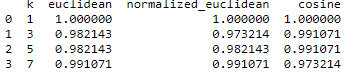

In [34]:
from IPython.display import Image
Image(filename='euclidean.PNG')

Plot a bar chart to compare the performance of hyperparameters.

In [ ]:
# Plotting a Bar Chart for accuracy
draw = df_res.plot(x='k', y=['euclidean', 'normalized_euclidean', 'cosine'], kind="bar")
draw.set(ylabel='Accuracy')

[Text(0, 0.5, 'Accuracy')]

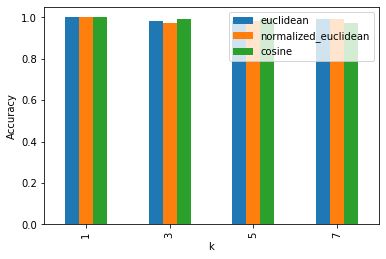

In [37]:
from IPython.display import Image
Image(filename='euclideangraph.png')

Ignoring k=1 if the value of accuracy for k=1 is 100%, since this more than often implies overfitting. Replace it with the value of numpy.nan.

In [ ]:
df_res.loc[df_res['k'] == 1.0, ['euclidean', 'normalized_euclidean', 'cosine']] = np.nan

Step 6 : Find the optimal hyperparameters.

In [ ]:
# In case the accuracy is the same for different k and different distance metric selecting the first of all the same
column_val = [c for c in df_res.columns if not c.startswith('k')]
col_max = df_res[column_val].max().idxmax(1)
best_dist_method = col_max
row_max = df_res[col_max].argmax()
best_k = int(df_res.iloc[row_max]['k'])
if df_res.isnull().values.any():
    print('\n\n\nBest k value is\033[1m', best_k, '\033[0mand best distance metric is\033[1m', best_dist_method, '\033[0m. Ignoring k=1 if the value of accuracy for k=1 is 100%, since this mostly implies overfitting')
else:
    print('\n\n\nBest k value is\033[1m', best_k, '\033[0mand best distance metric is\033[1m', best_dist_method, '\033[0m.')


Best k value is 7 and best distance metric is euclidean . Ignoring k=1 if the value of accuracy for k=1 is 100%, since this mostly implies overfitting

Step 7 : Use the test set and the optimal hyperparameters to compute the final accuracy.

In [ ]:
# Creating a list of list of all columns except 'class' by iterating through the development set
row_list_test = []
for index, rows in test_set.iterrows(): 
    my_list =[rows.SepalLengthCm, rows.SepalWidthCm, rows.PetalLengthCm, rows.PetalWidthCm]       
    row_list_test.append([my_list])
test_set_obs = []
for i in range(len(row_list_test)):
    test_set_obs.append(knn(test_set, pd.DataFrame(row_list_test[i]), best_k, best_dist_method, mean_test_set, std_test_set))
#print(test_set_obs)

In [ ]:
count = 0

for i,j in zip(test_class, test_set_obs):
    if i == j:
        count = count + 1
    else:
        pass
accuracy_test = count/(len(test_class))
print('Final Accuracy of the Test dataset is ', accuracy_test)

Final Accuracy of the Test dataset is 0.9473684210526315

In [ ]:
A final accuracy of above 90% is achieved using Cosine Similarity as the distance metric and the k-value of 3. The model gives good results ignoring the value of K=1 which resulted to overfitting.